<a href="https://colab.research.google.com/github/mohmaed7777/epilepsy-detection/blob/main/Epilepsy_Detection_Using_EEG_Signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# 2. Make a directory named “.kaggle”
! mkdir ~/.kaggle

In [3]:
#3. Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# import our datasets from kaggle
! kaggle datasets download oussamabenhassine/epilepsy-detection-using-eeg-signals

 41% 5.00M/12.3M [00:00<00:00, 40.0MB/s]
100% 12.3M/12.3M [00:00<00:00, 58.0MB/s]


In [6]:
! unzip epilepsy-detection-using-eeg-signals.zip

Archive:  epilepsy-detection-using-eeg-signals.zip
  inflating: eeg_data.csv            


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
print('Ready to go!')

Ready to go!


In [8]:
data = pd.read_csv('/content/eeg_data.csv')
data.head()

,FP1_power_delta,FP1_power_theta,FP1_power_alpha,FP1_power_beta,FP1_power_gamma,FP2_power_delta,FP2_power_theta,FP2_power_alpha,FP2_power_beta,FP2_power_gamma,...,T5_STD_D4,T5_STD_D5,T5_STD_D6,T6_STD_D1,T6_STD_D2,T6_STD_D3,T6_STD_D4,T6_STD_D5,T6_STD_D6,epileptic_
0,15.980332,8.633358,3.092433,0.846559,0.372832,17.581626,9.937238,3.485713,0.945396,0.428797,...,31.427918,29.699413,32.013546,3.583559,12.529528,45.831132,61.890813,34.783454,33.245906,1
1,223.267803,41.573241,13.043525,6.463381,6.168712,298.274432,50.013025,14.411482,6.659230,4.942250,...,24.822720,47.185918,93.619195,14.158489,15.217886,30.927407,77.324322,153.442359,213.780950,1
2,158.673907,31.788608,9.956198,3.736977,2.926979,232.762741,39.332981,10.956081,3.478036,2.153082,...,21.708222,47.412375,85.729645,9.493639,11.824569,24.555772,59.229187,112.406306,171.618208,1
3,29.767326,3.875543,1.553127,0.438266,0.140495,45.206547,5.173542,2.028637,0.528962,0.161283,...,26.319506,39.628894,51.473202,1.872515,5.392639,17.296780,35.824586,44.892899,79.613460,1
4,33.821075,3.635210,1.347280,0.313205,0.080396,55.670043,4.925017,1.783729,0.394463,0.102254,...,26.111048,39.177537,52.925676,1.408291,4.556997,12.733549,25.676801,44.406617,94.770581,1


In [9]:
data

,FP1_power_delta,FP1_power_theta,FP1_power_alpha,FP1_power_beta,FP1_power_gamma,FP2_power_delta,FP2_power_theta,FP2_power_alpha,FP2_power_beta,FP2_power_gamma,...,T5_STD_D4,T5_STD_D5,T5_STD_D6,T6_STD_D1,T6_STD_D2,T6_STD_D3,T6_STD_D4,T6_STD_D5,T6_STD_D6,epileptic_
0,15.980332,8.633358,3.092433,0.846559,0.372832,17.581626,9.937238,3.485713,0.945396,0.428797,...,31.427918,29.699413,32.013546,3.583559,12.529528,45.831132,61.890813,34.783454,33.245906,1
1,223.267803,41.573241,13.043525,6.463381,6.168712,298.274432,50.013025,14.411482,6.659230,4.942250,...,24.822720,47.185918,93.619195,14.158489,15.217886,30.927407,77.324322,153.442359,213.780950,1
2,158.673907,31.788608,9.956198,3.736977,2.926979,232.762741,39.332981,10.956081,3.478036,2.153082,...,21.708222,47.412375,85.729645,9.493639,11.824569,24.555772,59.229187,112.406306,171.618208,1
3,29.767326,3.875543,1.553127,0.438266,0.140495,45.206547,5.173542,2.028637,0.528962,0.161283,...,26.319506,39.628894,51.473202,1.872515,5.392639,17.296780,35.824586,44.892899,79.613460,1
4,33.821075,3.635210,1.347280,0.313205,0.080396,55.670043,4.925017,1.783729,0.394463,0.102254,...,26.111048,39.177537,52.925676,1.408291,4.556997,12.733549,25.676801,44.406617,94.770581,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,93.573012,9.060520,4.980545,4.839014,2.402408,103.479883,10.121498,5.411378,5.112091,2.410508,...,28.420439,35.838353,55.575530,13.980452,15.455901,17.599760,35.736742,44.639277,52.441626,0
2212,15.523587,3.195279,1.268068,0.788076,0.350012,15.177286,3.420879,1.324339,0.772379,0.340149,...,25.567858,29.982968,19.842641,3.896454,4.507998,9.674004,29.642064,32.178907,23.513508,0
2213,17.580684,2.208482,0.512273,0.122671,0.042173,18.294247,2.380609,0.560150,0.132999,0.045041,...,15.186601,23.281200,31.479138,1.183803,2.253192,6.133507,18.810084,29.451244,40.868567,0
2214,35.847315,3.354388,2.280252,2.368355,1.217081,33.889844,3.048972,1.356364,1.159790,0.632721,...,20.376012,23.182715,24.117538,6.995231,6.819144,9.820588,26.620415,30.167641,31.778504,0


In [10]:
data.columns

Index(['FP1_power_delta', 'FP1_power_theta', 'FP1_power_alpha',
       'FP1_power_beta', 'FP1_power_gamma', 'FP2_power_delta',
       'FP2_power_theta', 'FP2_power_alpha', 'FP2_power_beta',
       'FP2_power_gamma',
       ...
       'T5_STD_D4', 'T5_STD_D5', 'T5_STD_D6', 'T6_STD_D1', 'T6_STD_D2',
       'T6_STD_D3', 'T6_STD_D4', 'T6_STD_D5', 'T6_STD_D6', 'epileptic_'],
      dtype='object', length=668)

In [11]:
data.dtypes

FP1_power_delta    float64
FP1_power_theta    float64
FP1_power_alpha    float64
FP1_power_beta     float64
FP1_power_gamma    float64
                    ...   
T6_STD_D3          float64
T6_STD_D4          float64
T6_STD_D5          float64
T6_STD_D6          float64
epileptic_           int64
Length: 668, dtype: object

In [12]:
data.isnull().sum()

FP1_power_delta    0
FP1_power_theta    0
FP1_power_alpha    0
FP1_power_beta     0
FP1_power_gamma    0
                  ..
T6_STD_D3          0
T6_STD_D4          0
T6_STD_D5          0
T6_STD_D6          0
epileptic_         0
Length: 668, dtype: int64

In [13]:
data.describe()

,FP1_power_delta,FP1_power_theta,FP1_power_alpha,FP1_power_beta,FP1_power_gamma,FP2_power_delta,FP2_power_theta,FP2_power_alpha,FP2_power_beta,FP2_power_gamma,...,T5_STD_D4,T5_STD_D5,T5_STD_D6,T6_STD_D1,T6_STD_D2,T6_STD_D3,T6_STD_D4,T6_STD_D5,T6_STD_D6,epileptic_
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,2784.618464,988.760235,746.234771,701.487094,1001.431795,2085.578266,992.570476,895.149975,668.364261,1031.370227,...,58.296417,88.001721,143.249343,34.949327,29.083232,46.686025,61.305950,91.994480,150.603345,0.460289
std,27119.740834,12199.666703,12018.648373,10668.946271,14544.502538,20670.847816,12618.098105,14047.391047,10791.187751,14990.469348,...,203.322445,304.407625,468.151048,315.861267,171.065282,217.826912,207.851277,308.832664,489.946628,0.498533
min,0.025945,0.012101,0.009409,0.007828,0.008412,0.026174,0.018836,0.010871,0.006120,0.006863,...,0.950777,1.057651,1.118569,0.525890,0.846936,0.878841,0.909989,0.918962,1.115070,0.000000
25%,25.524041,3.983245,1.868825,0.789355,0.381195,27.138890,4.254592,1.989122,0.845677,0.408081,...,12.298674,14.891381,23.835592,3.525874,5.796019,11.084702,14.190864,16.742939,26.750093,0.000000
50%,68.865751,8.807711,3.874506,1.795211,0.972968,73.483311,9.688978,4.133793,1.863871,0.973485,...,18.643405,23.730646,39.095777,5.855205,8.580373,15.806232,20.932141,27.049199,44.603975,0.000000
75%,271.174926,30.093458,12.052042,6.926863,3.777847,288.354575,29.503963,12.237335,7.139232,3.782326,...,32.798456,51.946562,84.372372,11.453332,14.326938,27.297323,36.869445,57.139089,101.925711,1.000000
max,859895.816209,350651.120898,403916.724142,291058.726462,285573.572449,604373.606743,346870.948081,407756.698134,291640.733124,287933.513127,...,3283.112473,5501.471732,11030.429643,5777.660876,3620.162008,4585.801410,3620.523797,5538.873638,10730.168759,1.000000


In [14]:
df_copied = data.copy()

In [15]:
df_copied

,FP1_power_delta,FP1_power_theta,FP1_power_alpha,FP1_power_beta,FP1_power_gamma,FP2_power_delta,FP2_power_theta,FP2_power_alpha,FP2_power_beta,FP2_power_gamma,...,T5_STD_D4,T5_STD_D5,T5_STD_D6,T6_STD_D1,T6_STD_D2,T6_STD_D3,T6_STD_D4,T6_STD_D5,T6_STD_D6,epileptic_
0,15.980332,8.633358,3.092433,0.846559,0.372832,17.581626,9.937238,3.485713,0.945396,0.428797,...,31.427918,29.699413,32.013546,3.583559,12.529528,45.831132,61.890813,34.783454,33.245906,1
1,223.267803,41.573241,13.043525,6.463381,6.168712,298.274432,50.013025,14.411482,6.659230,4.942250,...,24.822720,47.185918,93.619195,14.158489,15.217886,30.927407,77.324322,153.442359,213.780950,1
2,158.673907,31.788608,9.956198,3.736977,2.926979,232.762741,39.332981,10.956081,3.478036,2.153082,...,21.708222,47.412375,85.729645,9.493639,11.824569,24.555772,59.229187,112.406306,171.618208,1
3,29.767326,3.875543,1.553127,0.438266,0.140495,45.206547,5.173542,2.028637,0.528962,0.161283,...,26.319506,39.628894,51.473202,1.872515,5.392639,17.296780,35.824586,44.892899,79.613460,1
4,33.821075,3.635210,1.347280,0.313205,0.080396,55.670043,4.925017,1.783729,0.394463,0.102254,...,26.111048,39.177537,52.925676,1.408291,4.556997,12.733549,25.676801,44.406617,94.770581,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,93.573012,9.060520,4.980545,4.839014,2.402408,103.479883,10.121498,5.411378,5.112091,2.410508,...,28.420439,35.838353,55.575530,13.980452,15.455901,17.599760,35.736742,44.639277,52.441626,0
2212,15.523587,3.195279,1.268068,0.788076,0.350012,15.177286,3.420879,1.324339,0.772379,0.340149,...,25.567858,29.982968,19.842641,3.896454,4.507998,9.674004,29.642064,32.178907,23.513508,0
2213,17.580684,2.208482,0.512273,0.122671,0.042173,18.294247,2.380609,0.560150,0.132999,0.045041,...,15.186601,23.281200,31.479138,1.183803,2.253192,6.133507,18.810084,29.451244,40.868567,0
2214,35.847315,3.354388,2.280252,2.368355,1.217081,33.889844,3.048972,1.356364,1.159790,0.632721,...,20.376012,23.182715,24.117538,6.995231,6.819144,9.820588,26.620415,30.167641,31.778504,0


In [16]:
data

,FP1_power_delta,FP1_power_theta,FP1_power_alpha,FP1_power_beta,FP1_power_gamma,FP2_power_delta,FP2_power_theta,FP2_power_alpha,FP2_power_beta,FP2_power_gamma,...,T5_STD_D4,T5_STD_D5,T5_STD_D6,T6_STD_D1,T6_STD_D2,T6_STD_D3,T6_STD_D4,T6_STD_D5,T6_STD_D6,epileptic_
0,15.980332,8.633358,3.092433,0.846559,0.372832,17.581626,9.937238,3.485713,0.945396,0.428797,...,31.427918,29.699413,32.013546,3.583559,12.529528,45.831132,61.890813,34.783454,33.245906,1
1,223.267803,41.573241,13.043525,6.463381,6.168712,298.274432,50.013025,14.411482,6.659230,4.942250,...,24.822720,47.185918,93.619195,14.158489,15.217886,30.927407,77.324322,153.442359,213.780950,1
2,158.673907,31.788608,9.956198,3.736977,2.926979,232.762741,39.332981,10.956081,3.478036,2.153082,...,21.708222,47.412375,85.729645,9.493639,11.824569,24.555772,59.229187,112.406306,171.618208,1
3,29.767326,3.875543,1.553127,0.438266,0.140495,45.206547,5.173542,2.028637,0.528962,0.161283,...,26.319506,39.628894,51.473202,1.872515,5.392639,17.296780,35.824586,44.892899,79.613460,1
4,33.821075,3.635210,1.347280,0.313205,0.080396,55.670043,4.925017,1.783729,0.394463,0.102254,...,26.111048,39.177537,52.925676,1.408291,4.556997,12.733549,25.676801,44.406617,94.770581,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,93.573012,9.060520,4.980545,4.839014,2.402408,103.479883,10.121498,5.411378,5.112091,2.410508,...,28.420439,35.838353,55.575530,13.980452,15.455901,17.599760,35.736742,44.639277,52.441626,0
2212,15.523587,3.195279,1.268068,0.788076,0.350012,15.177286,3.420879,1.324339,0.772379,0.340149,...,25.567858,29.982968,19.842641,3.896454,4.507998,9.674004,29.642064,32.178907,23.513508,0
2213,17.580684,2.208482,0.512273,0.122671,0.042173,18.294247,2.380609,0.560150,0.132999,0.045041,...,15.186601,23.281200,31.479138,1.183803,2.253192,6.133507,18.810084,29.451244,40.868567,0
2214,35.847315,3.354388,2.280252,2.368355,1.217081,33.889844,3.048972,1.356364,1.159790,0.632721,...,20.376012,23.182715,24.117538,6.995231,6.819144,9.820588,26.620415,30.167641,31.778504,0


In [17]:
data.drop(['epileptic_'], axis=1, inplace=True)

In [18]:
data.shape

(2216, 667)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [21]:
scaled_data = scaler.transform(data)
scaled_data

array([[-0.10211244, -0.0803586 , -0.06184639, ...,  0.00281449,
        -0.18529108, -0.23958513],
       [-0.0944673 , -0.07765792, -0.06101824, ...,  0.0770839 ,
         0.19901311,  0.12897704],
       [-0.09684964, -0.07846015, -0.06127517, ..., -0.00999384,
         0.0661084 ,  0.04290183],
       ...,
       [-0.10205342, -0.08088536, -0.06206112, ..., -0.20449938,
        -0.20256067, -0.22402347],
       [-0.10137971, -0.08079141, -0.06191399, ..., -0.16691437,
        -0.20024046, -0.24258083],
       [-0.10173185, -0.0808382 , -0.06201883, ..., -0.17371135,
        -0.20707754, -0.23175764]])

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=10)

In [24]:
pca.fit(scaled_data)

PCA(n_components=10)

In [25]:
x_pca = pca.transform(scaled_data)

In [26]:
scaled_data.shape

(2216, 667)

In [27]:
x_pca.shape

(2216, 10)

In [28]:
x_pca

array([[-1.84433996, -0.64383542, -0.63788301, ..., -1.73417303,
        -3.82926246, -2.36249741],
       [ 0.54708526,  0.89911566,  0.51634164, ..., -0.08794304,
        -2.02140354, -3.05797613],
       [-0.13206839,  0.95357577,  0.02054945, ...,  1.60805749,
        -1.23690202, -1.98283063],
       ...,
       [-3.09247132, -0.82014483, -2.23597157, ...,  0.87187163,
        -0.53854509,  4.54603272],
       [-2.73323329, -0.79247549, -1.62507493, ...,  1.36934005,
         1.22923234,  2.84741896],
       [-3.01097332, -0.79954896, -1.57909745, ..., -0.45405788,
         3.18357666,  2.9941219 ]])

In [29]:
pca_df = pd.DataFrame(x_pca, columns=['col1', 'col2', 'col3', 'col4','col5','col6','col7','col8','col9','col10'])
pca_df

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
0,-1.844340,-0.643835,-0.637883,-0.334634,0.880712,-1.054062,0.613921,-1.734173,-3.829262,-2.362497
1,0.547085,0.899116,0.516342,-1.019456,-0.242816,-1.283547,0.157039,-0.087943,-2.021404,-3.057976
2,-0.132068,0.953576,0.020549,-0.370646,-0.133368,-0.601685,0.504778,1.608057,-1.236902,-1.982831
3,-2.189182,-0.577077,-0.639091,0.017469,1.350867,-1.229728,1.938060,-4.570609,-4.497442,0.209630
4,-2.555095,-0.346142,-1.273998,0.748359,-0.469259,1.110590,0.120963,0.972897,2.850325,2.736929
...,...,...,...,...,...,...,...,...,...,...
2211,-1.787333,-0.504824,-0.608044,-0.253279,-0.100070,-1.150576,-1.074697,-0.429148,-0.927228,-1.678657
2212,-2.737656,-0.875278,-1.682219,0.869156,-0.218116,1.267553,0.501660,1.373579,2.100025,3.171642
2213,-3.092471,-0.820145,-2.235972,1.307212,0.271578,1.064529,2.433576,0.871872,-0.538545,4.546033
2214,-2.733233,-0.792475,-1.625075,0.695978,0.334263,1.483251,0.805799,1.369340,1.229232,2.847419


In [30]:
pca_df['target'] = df_copied['epileptic_']

In [31]:
pca_df

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,target
0,-1.844340,-0.643835,-0.637883,-0.334634,0.880712,-1.054062,0.613921,-1.734173,-3.829262,-2.362497,1
1,0.547085,0.899116,0.516342,-1.019456,-0.242816,-1.283547,0.157039,-0.087943,-2.021404,-3.057976,1
2,-0.132068,0.953576,0.020549,-0.370646,-0.133368,-0.601685,0.504778,1.608057,-1.236902,-1.982831,1
3,-2.189182,-0.577077,-0.639091,0.017469,1.350867,-1.229728,1.938060,-4.570609,-4.497442,0.209630,1
4,-2.555095,-0.346142,-1.273998,0.748359,-0.469259,1.110590,0.120963,0.972897,2.850325,2.736929,1
...,...,...,...,...,...,...,...,...,...,...,...
2211,-1.787333,-0.504824,-0.608044,-0.253279,-0.100070,-1.150576,-1.074697,-0.429148,-0.927228,-1.678657,0
2212,-2.737656,-0.875278,-1.682219,0.869156,-0.218116,1.267553,0.501660,1.373579,2.100025,3.171642,0
2213,-3.092471,-0.820145,-2.235972,1.307212,0.271578,1.064529,2.433576,0.871872,-0.538545,4.546033,0
2214,-2.733233,-0.792475,-1.625075,0.695978,0.334263,1.483251,0.805799,1.369340,1.229232,2.847419,0


In [32]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    2216 non-null   float64
 1   col2    2216 non-null   float64
 2   col3    2216 non-null   float64
 3   col4    2216 non-null   float64
 4   col5    2216 non-null   float64
 5   col6    2216 non-null   float64
 6   col7    2216 non-null   float64
 7   col8    2216 non-null   float64
 8   col9    2216 non-null   float64
 9   col10   2216 non-null   float64
 10  target  2216 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 190.6 KB


In [33]:
pca_df.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,target
count,2.216000e+03,2216.000000,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2216.000000,2.216000e+03,2.216000e+03,2216.000000
mean,-1.026054e-16,0.000000,-2.565136e-17,1.282568e-17,5.130272e-17,5.771557e-17,-1.282568e-17,0.000000,6.412841e-18,2.565136e-17,0.460289
std,1.624701e+01,8.424921,5.470873e+00,5.113033e+00,4.431236e+00,4.014601e+00,3.545192e+00,3.370227,3.271019e+00,3.196214e+00,0.498533
min,-4.046414e+00,-98.538823,-1.041623e+02,-4.327730e+01,-6.567690e+01,-8.291581e+01,-7.129505e+01,-31.370135,-3.570614e+01,-3.037501e+01,0.000000
25%,-2.551850e+00,-0.790668,-1.361934e+00,-4.339380e-01,-5.769027e-01,-6.809819e-01,-8.586587e-01,-1.617513,-1.474447e+00,-1.352195e+00,0.000000
50%,-2.183224e+00,-0.548800,-8.153716e-01,2.106249e-01,-9.932918e-02,7.248696e-02,3.831966e-01,0.241887,1.280618e-01,2.838240e-01,0.000000
75%,-1.197001e+00,0.019451,1.534560e-01,6.197287e-01,4.644715e-01,7.766112e-01,1.273399e+00,1.819358,1.683775e+00,1.519505e+00,1.000000
max,3.368033e+02,293.610703,1.276141e+02,2.013122e+02,1.195177e+02,8.401705e+01,7.809040e+01,70.836434,6.178035e+01,5.841343e+01,1.000000


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,target
col1,1.000000e+00,1.836670e-14,-7.948815e-18,7.635541e-17,1.639316e-16,4.057772e-17,1.388117e-16,1.593191e-16,-8.683001e-17,-3.281138e-16,0.037671
col2,1.836670e-14,1.000000e+00,-1.575705e-14,2.079087e-15,7.286843e-15,9.168958e-14,5.499764e-14,6.046269e-13,9.431149e-13,4.410685e-13,-0.053380
col3,-7.948815e-18,-1.575705e-14,1.000000e+00,2.010998e-13,8.258373e-13,1.113792e-11,6.162451e-12,7.077599e-11,1.136193e-10,4.881681e-11,-0.032538
col4,7.635541e-17,2.079087e-15,2.010998e-13,1.000000e+00,1.754251e-11,2.223854e-10,1.325743e-10,1.474587e-09,2.287752e-09,1.079027e-09,-0.025674
col5,1.639316e-16,7.286843e-15,8.258373e-13,1.754251e-11,1.000000e+00,9.533464e-10,5.790101e-10,6.378512e-09,9.824580e-09,4.714623e-09,0.046721
col6,4.057772e-17,9.168958e-14,1.113792e-11,2.223854e-10,9.533464e-10,1.000000e+00,7.277320e-09,8.022134e-08,1.249536e-07,5.852941e-08,0.017858
col7,1.388117e-16,5.499764e-14,6.162451e-12,1.325743e-10,5.790101e-10,7.277320e-09,1.000000e+00,4.852039e-08,7.506625e-08,3.587513e-08,-0.063251
col8,1.593191e-16,6.046269e-13,7.077599e-11,1.474587e-09,6.378512e-09,8.022134e-08,4.852039e-08,1.000000e+00,8.264166e-07,3.937080e-07,-0.052995
col9,-8.683001e-17,9.431149e-13,1.136193e-10,2.287752e-09,9.824580e-09,1.249536e-07,7.506625e-08,8.264166e-07,1.000000e+00,6.039353e-07,0.003030
col10,-3.281138e-16,4.410685e-13,4.881681e-11,1.079027e-09,4.714623e-09,5.852941e-08,3.587513e-08,3.937080e-07,6.039353e-07,1.000000e+00,0.053994


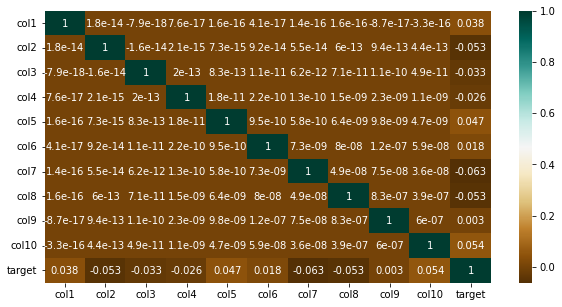

In [34]:
plt.figure(figsize=(10,5))
tabcorr = pca_df.corr()
sns.heatmap(tabcorr, cmap='BrBG',annot=True)
tabcorr

In [35]:
pca_df.columns

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9',
       'col10', 'target'],
      dtype='object')

In [36]:
X = pca_df.drop('target', axis=1)
Y = pca_df.drop(['col1','col2','col3','col4','col5','col6','col7','col8','col9','col10'], axis=1)
X.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
0,-1.844340,-0.643835,-0.637883,-0.334634,0.880712,-1.054062,0.613921,-1.734173,-3.829262,-2.362497
1,0.547085,0.899116,0.516342,-1.019456,-0.242816,-1.283547,0.157039,-0.087943,-2.021404,-3.057976
2,-0.132068,0.953576,0.020549,-0.370646,-0.133368,-0.601685,0.504778,1.608057,-1.236902,-1.982831
3,-2.189182,-0.577077,-0.639091,0.017469,1.350867,-1.229728,1.938060,-4.570609,-4.497442,0.209630
4,-2.555095,-0.346142,-1.273998,0.748359,-0.469259,1.110590,0.120963,0.972897,2.850325,2.736929


In [37]:
Y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state = 1)

In [39]:
x_train.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
468,-1.411133,0.524100,-0.171545,0.059795,-0.502760,0.671764,1.069509,-0.756990,2.186897,0.566457
598,2.031162,1.426144,2.551346,-1.357806,-1.123971,2.196485,-0.605310,-3.406360,6.194830,1.066450
1432,-2.941328,-0.951101,-1.315557,1.378087,-0.320072,-0.293739,-0.327467,1.363955,0.197549,-0.017872
125,-1.913679,-0.797484,-0.428774,-0.389843,-0.030560,-1.604197,-0.853550,-3.309445,-1.700226,-2.659856
400,-3.057134,-0.814458,-2.180582,1.187174,0.220536,1.040788,0.604577,2.940349,0.353272,2.756671


In [40]:
x_test.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
725,-2.604721,-0.567587,-1.468639,1.017677,-0.239818,0.220445,-0.070551,1.417623,0.703598,1.197467
1047,-2.566481,-0.720371,-1.289264,0.590710,-0.672555,1.114921,0.484340,0.922843,2.528832,1.988931
1421,-2.730256,-0.943654,-1.573658,0.709644,0.224941,1.318858,0.771710,1.275783,0.468083,2.507669
1144,-2.614874,-1.008335,-1.535834,0.528074,0.896306,0.234348,1.402352,-0.577372,-2.691973,1.456759
1399,-2.098881,-0.447864,-1.570671,0.605930,0.105471,0.404574,1.710667,3.620273,-1.383838,0.209825


In [41]:
y_train.head()

,target
468,1
598,1
1432,0
125,1
400,1


In [42]:
y_test.head()

,target
725,1
1047,0
1421,0
1144,0
1399,0


# **Implementing KNN Classifier:=**

In [43]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=6)

model_knn.fit(x_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

In [44]:
from sklearn.metrics import accuracy_score

y_pred_knn = model_knn.predict(x_test)

knn_accu = accuracy_score(y_test, y_pred_knn)

knn_accu

0.6779279279279279

# **Implementing KNN with MinMax Scaling:=**

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler_mm = MinMaxScaler()
x_train_mm = scaler_mm.fit_transform(X)

x_train_mm

array([[0.00646054, 0.24963689, 0.44665633, ..., 0.28996142, 0.32698766,
        0.31549728],
       [0.01347661, 0.25357149, 0.45163624, ..., 0.30606831, 0.34553237,
        0.30766429],
       [0.01148408, 0.25371036, 0.44949714, ..., 0.32266216, 0.35357966,
        0.31977336],
       ...,
       [0.00279872, 0.24918729, 0.43976138, ..., 0.31545924, 0.36074328,
        0.39330617],
       [0.00385267, 0.24925785, 0.44239709, ..., 0.32032652, 0.37887685,
        0.37417515],
       [0.00303782, 0.24923981, 0.44259546, ..., 0.3024862 , 0.39892418,
        0.37582742]])

In [47]:
x_train_minmax, x_test_minmax, y_train, y_test = train_test_split(x_train_mm, Y, test_size=0.2, random_state=1)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=6)

model_knn.fit(x_train_minmax, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

In [49]:
y_pred_knn = model_knn.predict(x_test_minmax)

knn_accu = accuracy_score(y_test, y_pred_knn)

knn_accu

0.5900900900900901

# **Implementing Support Vector Machine:=**

In [50]:
from sklearn import model_selection
from sklearn.svm import SVC

model_svc = SVC()

model_svc.fit(x_train, y_train)
model_svc.score(x_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6238738738738738

In [51]:
model_svc2 = SVC()

model_svc2.fit(x_train_minmax, y_train)
model_svc2.score(x_test_minmax, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5653153153153153

# **Implementing DecisionTree Classifier:=**

In [52]:
from sklearn import tree 

tree_model = tree.DecisionTreeClassifier()

tree_model.fit(x_train, y_train)

tree_model.score(x_test, y_test)

0.6846846846846847

In [53]:
tree_model2 = tree.DecisionTreeClassifier()

tree_model2.fit(x_train_minmax, y_train)

tree_model2.score(x_test_minmax, y_test)

0.6644144144144144

# **Implementing of Logistic Regression:=**

In [54]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(x_train, y_train)

lr_model.score(x_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5900900900900901

In [55]:
lr_model2 = LogisticRegression()

lr_model2.fit(x_train_minmax, y_train)

lr_model2.score(x_test_minmax, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5608108108108109

# **Manual CrossValidation:**

**Make 10 folds cross validation, dividing your combined(training + validations sets) into 10 folds in diffierent combinations manually with the function train_test_split().**

In [56]:
def train_test_split(model, x_train, x_test, y_train, y_test):

  model.fit(x_train, y_train)
  return model.score(x_test, y_test)

In [129]:
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=20)

score_lr = []
#score_svm = []
score_rf = []
score_xb = []

for train_index, test_index in folds.split(X, Y):

   score_lr.append(train_test_split(LogisticRegression(), x_train, x_test, y_train, y_test))
   #score_svm.append(train_test_split(SVC(), x_train, x_test, y_train, y_test))
   score_rf.append(train_test_split(RandomForestClassifier(n_estimators=10), x_train, x_test, y_train, y_test))
   score_xb.append(train_test_split(XGBClassifier(learning_rate=0.300000012, max_depth=6,n_estimators=10,random_state=5441))



  

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-56-526cccc732ca>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tru

In [117]:
score_lr

[0.5900900900900901,
 0.5900900900900901,
 0.5900900900900901,
 0.5900900900900901,
 0.5900900900900901,
 0.5900900900900901,
 0.5900900900900901,
 0.5900900900900901,
 0.5900900900900901,
 0.5900900900900901,
 0.5900900900900901,
 0.5900900900900901,
 0.5900900900900901,
 0.5900900900900901,
 0.5900900900900901,
 0.5900900900900901,
 0.5900900900900901,
 0.5900900900900901,
 0.5900900900900901,
 0.5900900900900901]

In [108]:
ave_lr = sum(score_lr)/len(score_lr)
ave_lr

0.5900900900900901

In [109]:
#score_svm

[0.6238738738738738,
 0.6238738738738738,
 0.6238738738738738,
 0.6238738738738738,
 0.6238738738738738,
 0.6238738738738738,
 0.6238738738738738,
 0.6238738738738738,
 0.6238738738738738,
 0.6238738738738738,
 0.6238738738738738,
 0.6238738738738738,
 0.6238738738738738,
 0.6238738738738738,
 0.6238738738738738,
 0.6238738738738738,
 0.6238738738738738,
 0.6238738738738738,
 0.6238738738738738,
 0.6238738738738738]

In [110]:
#ave_svm = sum(score_svm)/len(score_svm)
#ave_svm

0.623873873873874

In [130]:
score_rf

[0.7522522522522522,
 0.7522522522522522,
 0.7567567567567568,
 0.7522522522522522,
 0.7567567567567568,
 0.7454954954954955,
 0.7522522522522522,
 0.7522522522522522,
 0.7522522522522522,
 0.7545045045045045,
 0.7567567567567568,
 0.7545045045045045,
 0.7477477477477478,
 0.75,
 0.740990990990991,
 0.7477477477477478,
 0.7522522522522522,
 0.7567567567567568,
 0.7612612612612613,
 0.7567567567567568]

In [131]:
ave_rf = sum(score_rf)/len(score_rf)
ave_rf

0.75259009009009

# **Applying XGboost classifier:=**

In [132]:
from xgboost import XGBClassifier

In [133]:
model = XGBClassifier()

In [63]:
model.fit()